In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import load_model
import pandas as pd
import numpy as np
import tensorflow as tf

# LOAD THE DATA
train = pd.read_csv("C:/Users/yalaz/Documents/DSTI/Modules/ANN/Assignment/Mix1/train_mix1.csv", header=None)
test = pd.read_csv("C:/Users/yalaz/Documents/DSTI/Modules/ANN/Assignment/Mix1/test_mix1.csv", header=None)

# PREPARE DATA FOR NEURAL NETWORK
Y_train = train.iloc[:,-1]#only the last column
X_train = train.iloc[:,:-1]#everything except the last column

X_test = test.iloc[:,:-1]#everything except the last column
Y_test = test.iloc[:,-1]#only the last column 

X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical(Y_test, num_classes = 10)

In [2]:
from sklearn.model_selection import train_test_split
# Set the random seed
random_seed = 2
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

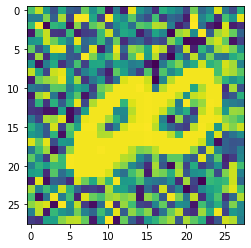

In [3]:
import matplotlib.pyplot as plt
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [24]:
from keras.layers import BatchNormalization, Conv2D, MaxPool2D
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from keras.layers import Flatten
from tensorflow import keras

# Set the CNN model 
model = Sequential()

model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# Define the optimizer
optimizer = RMSprop(lr=0.05, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [3]:
# Set a learning rate annealer
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [4]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

datagen.fit(X_train)

In [ ]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=64),
                              epochs = 30, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=None
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
141/141 - 12s - loss: 1.3662 - accuracy: 0.6129 - val_loss: 1.9852 - val_accuracy: 0.6930
Epoch 2/30
141/141 - 13s - loss: 0.5428 - accuracy: 0.8308 - val_loss: 1.3100 - val_accuracy: 0.6920
Epoch 3/30
141/141 - 13s - loss: 0.3800 - accuracy: 0.8826 - val_loss: 0.3726 - val_accuracy: 0.9070
Epoch 4/30
141/141 - 13s - loss: 0.3162 - accuracy: 0.9003 - val_loss: 0.5038 - val_accuracy: 0.8860
Epoch 5/30
141/141 - 14s - loss: 0.2894 - accuracy: 0.9091 - val_loss: 0.2952 - val_accuracy: 0.9270
Epoch 6/30
141/141 - 14s - loss: 0.2478 - accuracy: 0.9240 - val_loss: 0.5088 - val_accuracy: 0.8650
Epoch 7/30
141/141 - 14s - loss: 0.2492 - accuracy: 0.9237 - val_loss: 0.3857 - val_accuracy: 0.9010
Epoch 8/30
141/141 - 14s - loss: 0.2271 - accuracy: 0.9309 - val_loss: 0.2386 - val_accuracy: 0.9390
Epoch 9/30
141/141 - 14s - loss: 0.2201 - accuracy: 0.9312 - val_loss: 0.1426 - val_accuracy: 0.9610
Epoch 10/30
141/141 - 15s - loss: 0.2012 - accuracy: 0.9369 - val_loss: 0.1859 - val_accura

In [ ]:
print("Testing X matrix shape", X_test.shape)
print("Testing Y matrix shape", Y_test.shape)

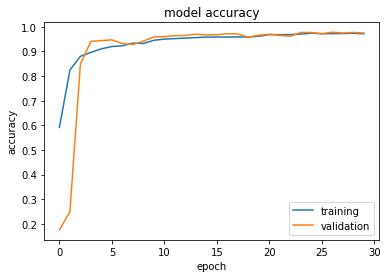


Test loss: 0.0544
Test accuracy: 0.983


In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print()
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [112]:
final = pd.read_csv("C:/Users/yalaz/Documents/DSTI/Modules/ANN/Assignment/test_data.csv", header=None)
print(type(final))
X_final = final.values.reshape(-1,28,28,1)

predictions = model.predict(X_final)
results = np.argmax(predictions,axis = 1)
print(results)

<class 'pandas.core.frame.DataFrame'>
[6 6 8 ... 6 0 3]


In [113]:
results = pd.Series(results,name="Category")
submission = pd.concat([pd.Series(range(0,50000),name = "Id"),results],axis = 1)

submission.to_csv("C:/Users/yalaz/Documents/DSTI/Modules/ANN/Assignment/cnn_mnist4.csv",index=False)